## QUESTION 1

In [6]:
import matplotlib.pyplot as plt 
import numpy as np
import json,os
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
os.makedirs("outputs_1", exist_ok=True)

config_file = "config.json"

with open(config_file, 'r') as f:
    config = json.load(f)
    
TEST_SIZE = config.get("test_size")
TYPE = config.get("type")
RANDOM_STATE = config.get("random_state", 42)

iris = load_iris()
x,y = iris.data, iris.target


if TYPE == 1:
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE, random_state=RANDOM_STATE,stratify=y)
    clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
elif TYPE == 2:
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
    clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
else:
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE)
    clf = DecisionTreeClassifier()


clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred,target_names=iris.target_names))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print("rows: actual, columns: predicted")
print("                          Setosa  Versicolor  Virginica")
for i, species in enumerate(iris.target_names):
    print(f"{species:12} {cm[i][0]:7} {cm[i][1]:11} {cm[i][2]:10}")
    
    
print("Manual precision, recall, F1-score calculation:")

precision = recall = f1_score = 0

for i, species in enumerate(iris.target_names):
    TP = cm[i][i]
    FP = sum(cm[:,i]) - TP
    FN = sum(cm[i,:]) - TP
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    print(f"{species}: Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1_score:.4f}")    

with open(os.path.join("outputs_1", f"confusion_matrix_type_{TYPE}_TS_{TEST_SIZE}_RS_{RANDOM_STATE}.txt"), 'w') as f:
    f.write("Confusion Matrix:\n")
    f.write("rows: actual, columns: predicted\n")
    f.write("                          Setosa  Versicolor  Virginica\n")
    for i, species in enumerate(iris.target_names):
        f.write(f"{species:12} {cm[i][0]:7} {cm[i][1]:11} {cm[i][2]:10}\n")
    f.write("\nManual precision, recall, F1-score calculation:\n")
    f.write(f"{species}: Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1_score:.4f}")    
    
plt.figure(figsize=(120,80))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title(f"Decision Tree for Iris Dataset - {TYPE}, Test Size: {TEST_SIZE}, Random State: {RANDOM_STATE}")

plt.savefig(os.path.join("outputs_1", f"decision_tree_type_{TYPE}_TS_{TEST_SIZE}_RS_{RANDOM_STATE}.png"))
plt.show()

Accuracy: 0.9333%
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.82      1.00      0.90         9
   virginica       1.00      0.78      0.88         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30

Confusion Matrix:
rows: actual, columns: predicted
                          Setosa  Versicolor  Virginica
setosa            12           0          0
versicolor         0           9          0
virginica          0           2          7
Manual precision, recall, F1-score calculation:
setosa: Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
versicolor: Precision: 0.8182, Recall: 1.0000, F1-score: 0.9000
virginica: Precision: 1.0000, Recall: 0.7778, F1-score: 0.8750


## QUESTION 2a

categorical variables:
[]
No. of categorical variables: 0
Accuracy: 0.9023%
Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.87      0.98      0.92       552
        Spam       0.96      0.79      0.87       369

    accuracy                           0.90       921
   macro avg       0.92      0.88      0.89       921
weighted avg       0.91      0.90      0.90       921

Confusion Matrix:
rows: actual, columns: predicted
                          Not Spam  Spam
Not Spam         541          11
Spam              79         290
Manual precision, recall, F1-score calculation:
Not Spam: Precision: 0.8726, Recall: 0.9801, F1-score: 0.9232
Spam: Precision: 0.9635, Recall: 0.7859, F1-score: 0.8657


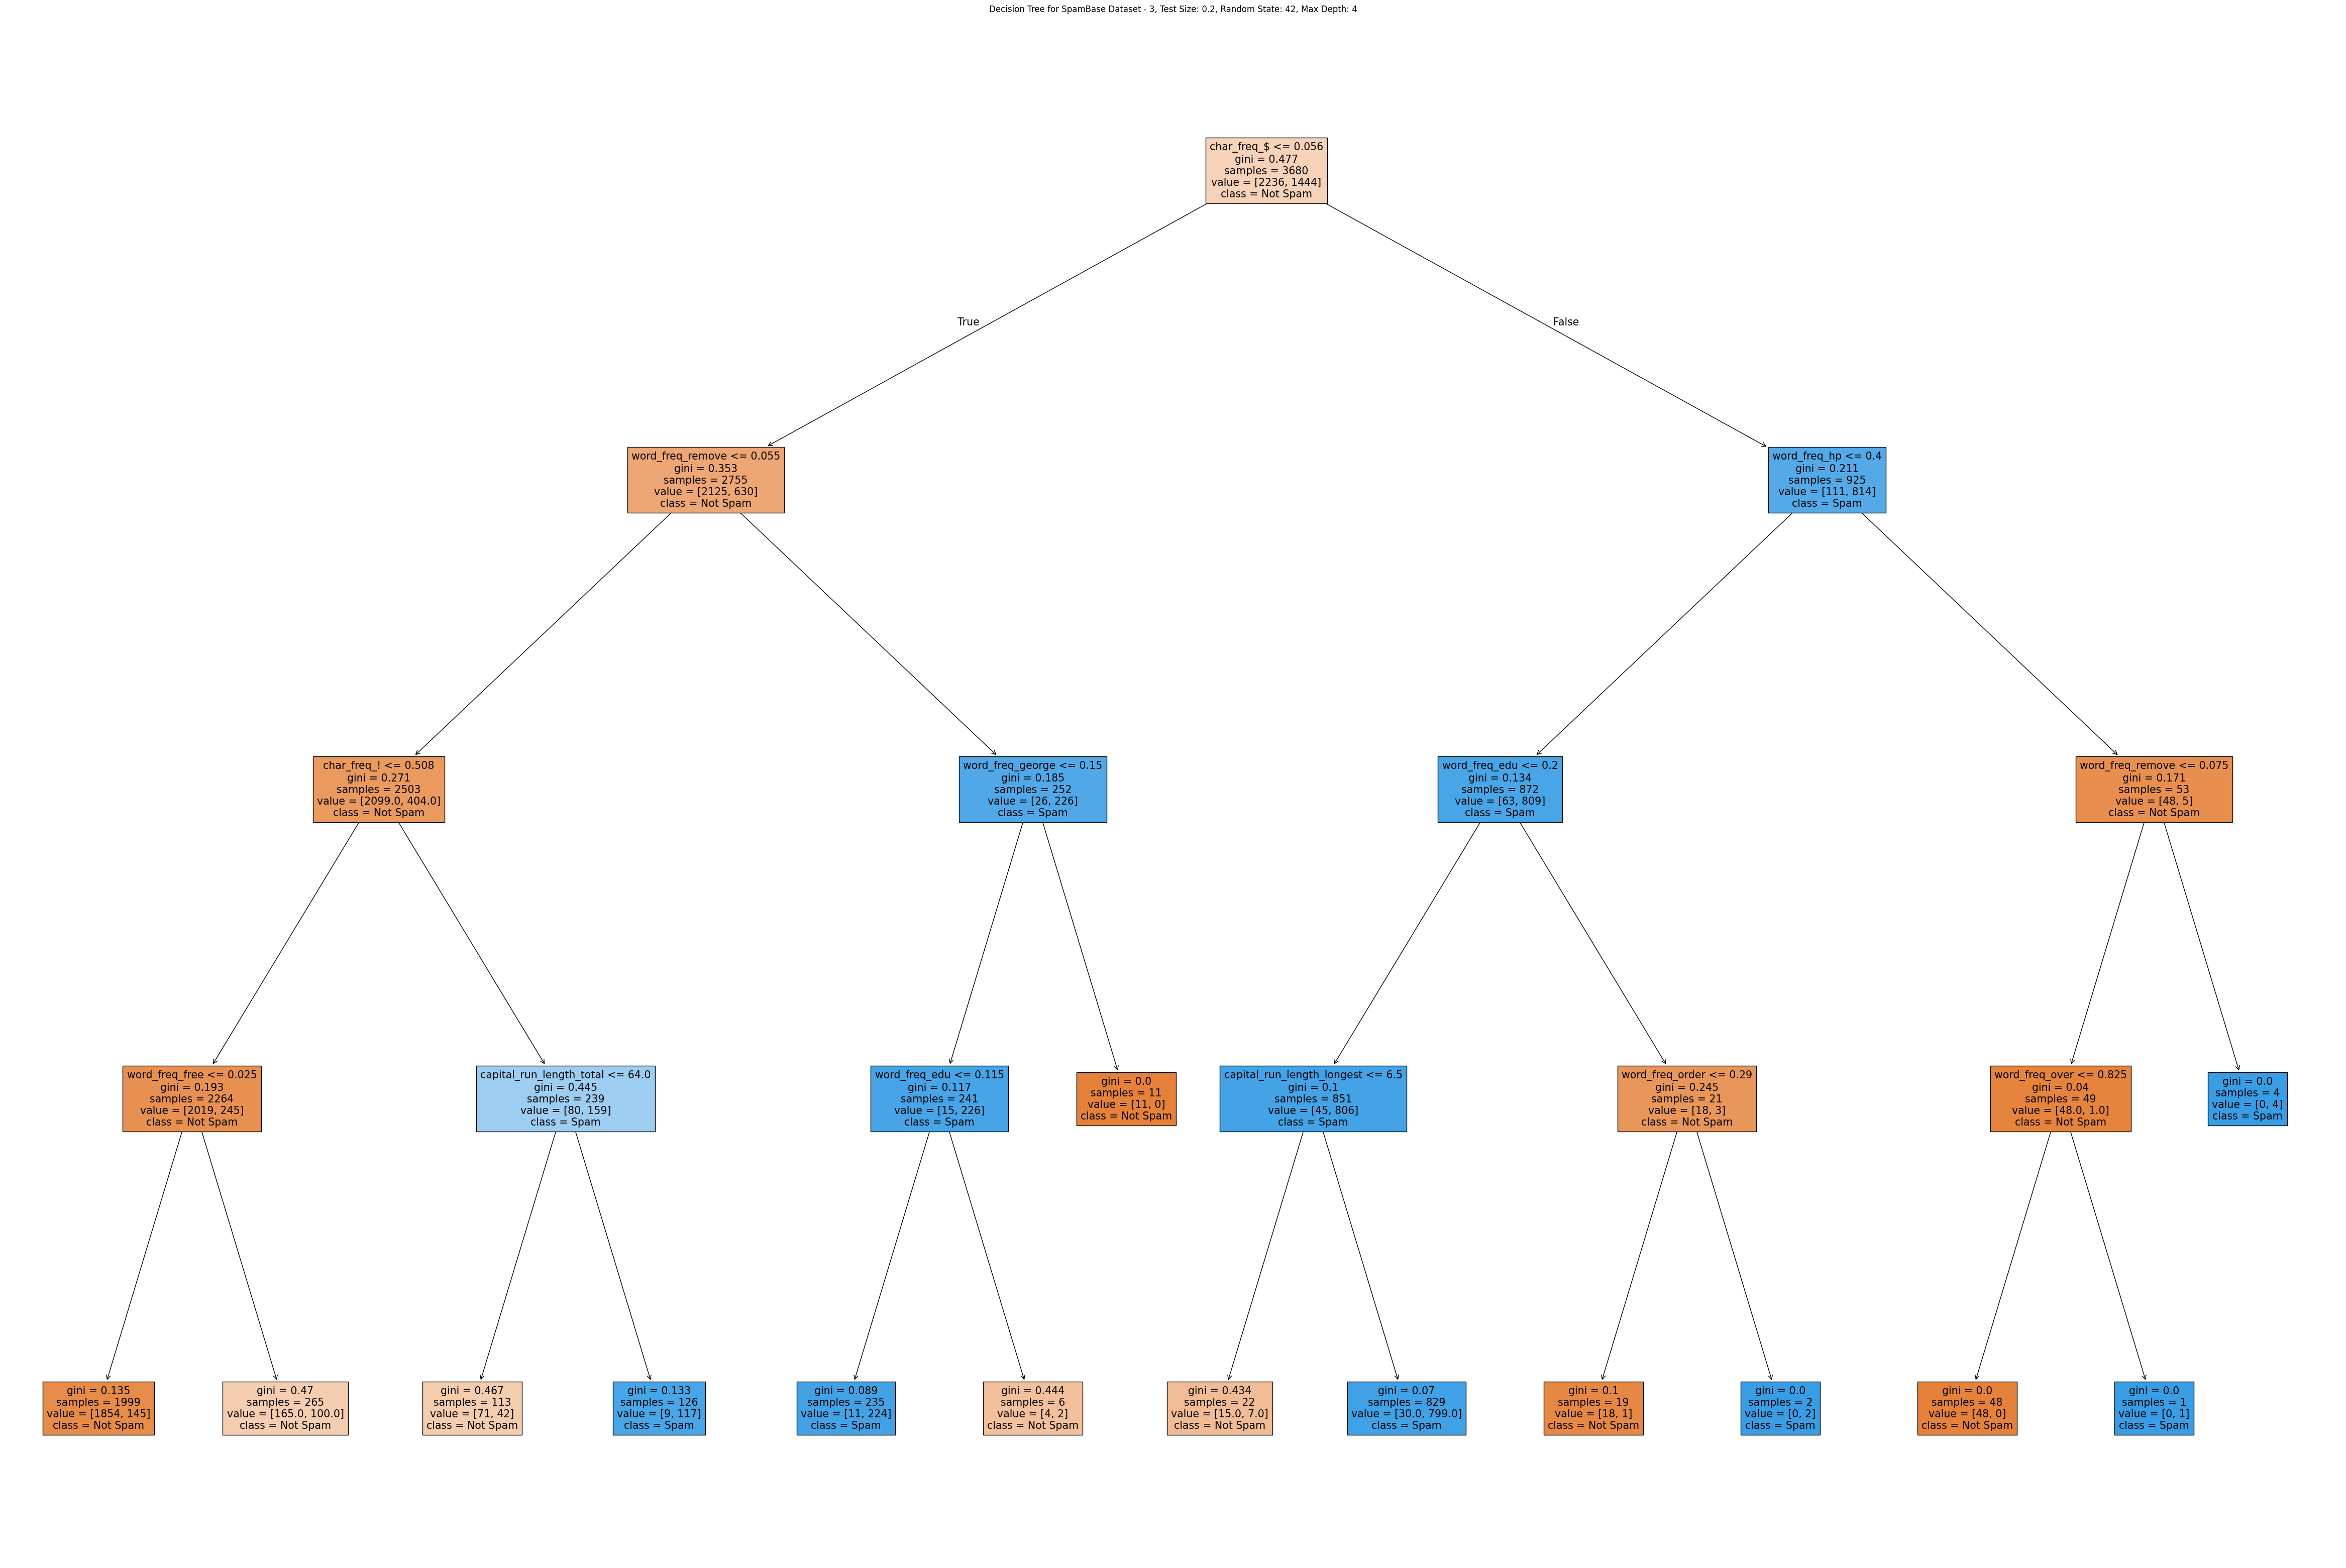

In [7]:
import json
import matplotlib.pyplot as plt 
import pandas as pd
import os
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv("spambase.csv")
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


os.makedirs("outputs_2", exist_ok=True)

config_file = "config.json"

with open(config_file, 'r') as f:
    config = json.load(f)
    
TEST_SIZE = config.get("test_size")
TYPE = config.get("type")
RANDOM_STATE = config.get("random_state", 42)
MAX_DEPTH = config.get("max_depth", 4)

new_df = df.dropna()

s = (new_df.dtypes == 'object')
object_cols = list(s[s].index)
print("categorical variables:")
print(object_cols)
print("No. of categorical variables:",len(object_cols) )
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_df[object_cols]))
OH_cols.index = new_df.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_df.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

df = df_final

if TYPE == 1:
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE, random_state=RANDOM_STATE,stratify=y)
    clf = DecisionTreeClassifier(random_state=RANDOM_STATE,max_depth=MAX_DEPTH)
elif TYPE == 2:
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
    clf = DecisionTreeClassifier(random_state=RANDOM_STATE,max_depth=MAX_DEPTH)
else:
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE)
    clf = DecisionTreeClassifier(max_depth=MAX_DEPTH)


clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred,target_names=["Not Spam", "Spam"]))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print("rows: actual, columns: predicted")
print("                          Not Spam  Spam")
for i, species in enumerate(["Not Spam", "Spam"]):
    print(f"{species:12} {cm[i][0]:7} {cm[i][1]:11}")
    
    
print("Manual precision, recall, F1-score calculation:")

precision = recall = f1_score = 0

for i, species in enumerate(["Not Spam", "Spam"]):
    TP = cm[i][i]
    FP = sum(cm[:,i]) - TP
    FN = sum(cm[i,:]) - TP
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    print(f"{species}: Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1_score:.4f}")    

with open(os.path.join("outputs_2", f"confusion_matrix_type_{TYPE}_TS_{TEST_SIZE}_RS_{RANDOM_STATE}_MD_{MAX_DEPTH}.txt"), 'w') as f:
    f.write("Confusion Matrix:\n")
    f.write("rows: actual, columns: predicted\n")
    f.write("                          Not Spam  Spam\n")
    for i, species in enumerate(["Not Spam", "Spam"]):
        f.write(f"{species:12} {cm[i][0]:7} {cm[i][1]:11}\n")
    f.write("\nManual precision, recall, F1-score calculation:\n")
    f.write(f"{species}: Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1_score:.4f}")    
    
plt.figure(figsize=(60,40))
plot_tree(clf, filled=True, feature_names=df.columns[:-1], class_names=["Not Spam", "Spam"])
plt.title(f"Decision Tree for SpamBase Dataset - {TYPE}, Test Size: {TEST_SIZE}, Random State: {RANDOM_STATE}, Max Depth: {MAX_DEPTH}")

plt.savefig(os.path.join("outputs_2", f"decision_tree_type_{TYPE}_TS_{TEST_SIZE}_RS_{RANDOM_STATE}_MD_{MAX_DEPTH}.png"))
plt.show()

In [ ]:
## QUESTION 2b

Accuracy: 0.4615
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           7       0.00      0.00      0.00         1
           8       0.57      0.57      0.57         7
           9       0.00      0.00      0.00         5
          10       0.41      0.76      0.53        17
          11       0.55      0.48      0.51        25
          12       0.43      0.38      0.40        16
          13       0.46      0.46      0.46        13
          14       0.25      0.08      0.12        12
          15       0.50      1.00      0.67        10
          16       0.80      0.44      0.57         9
          17       0.27      0.60      0.38         5
          18       0.00      0.00      0.00         7
          19       0.00      0.00      0.00         1

    accuracy                           0.46       130
   macro avg       0.37      0.38      0.35       130
weighted avg       0.43      0.46      0

C:\Users\Ashutosh Das\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Ashutosh Das\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Ashutosh Das\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

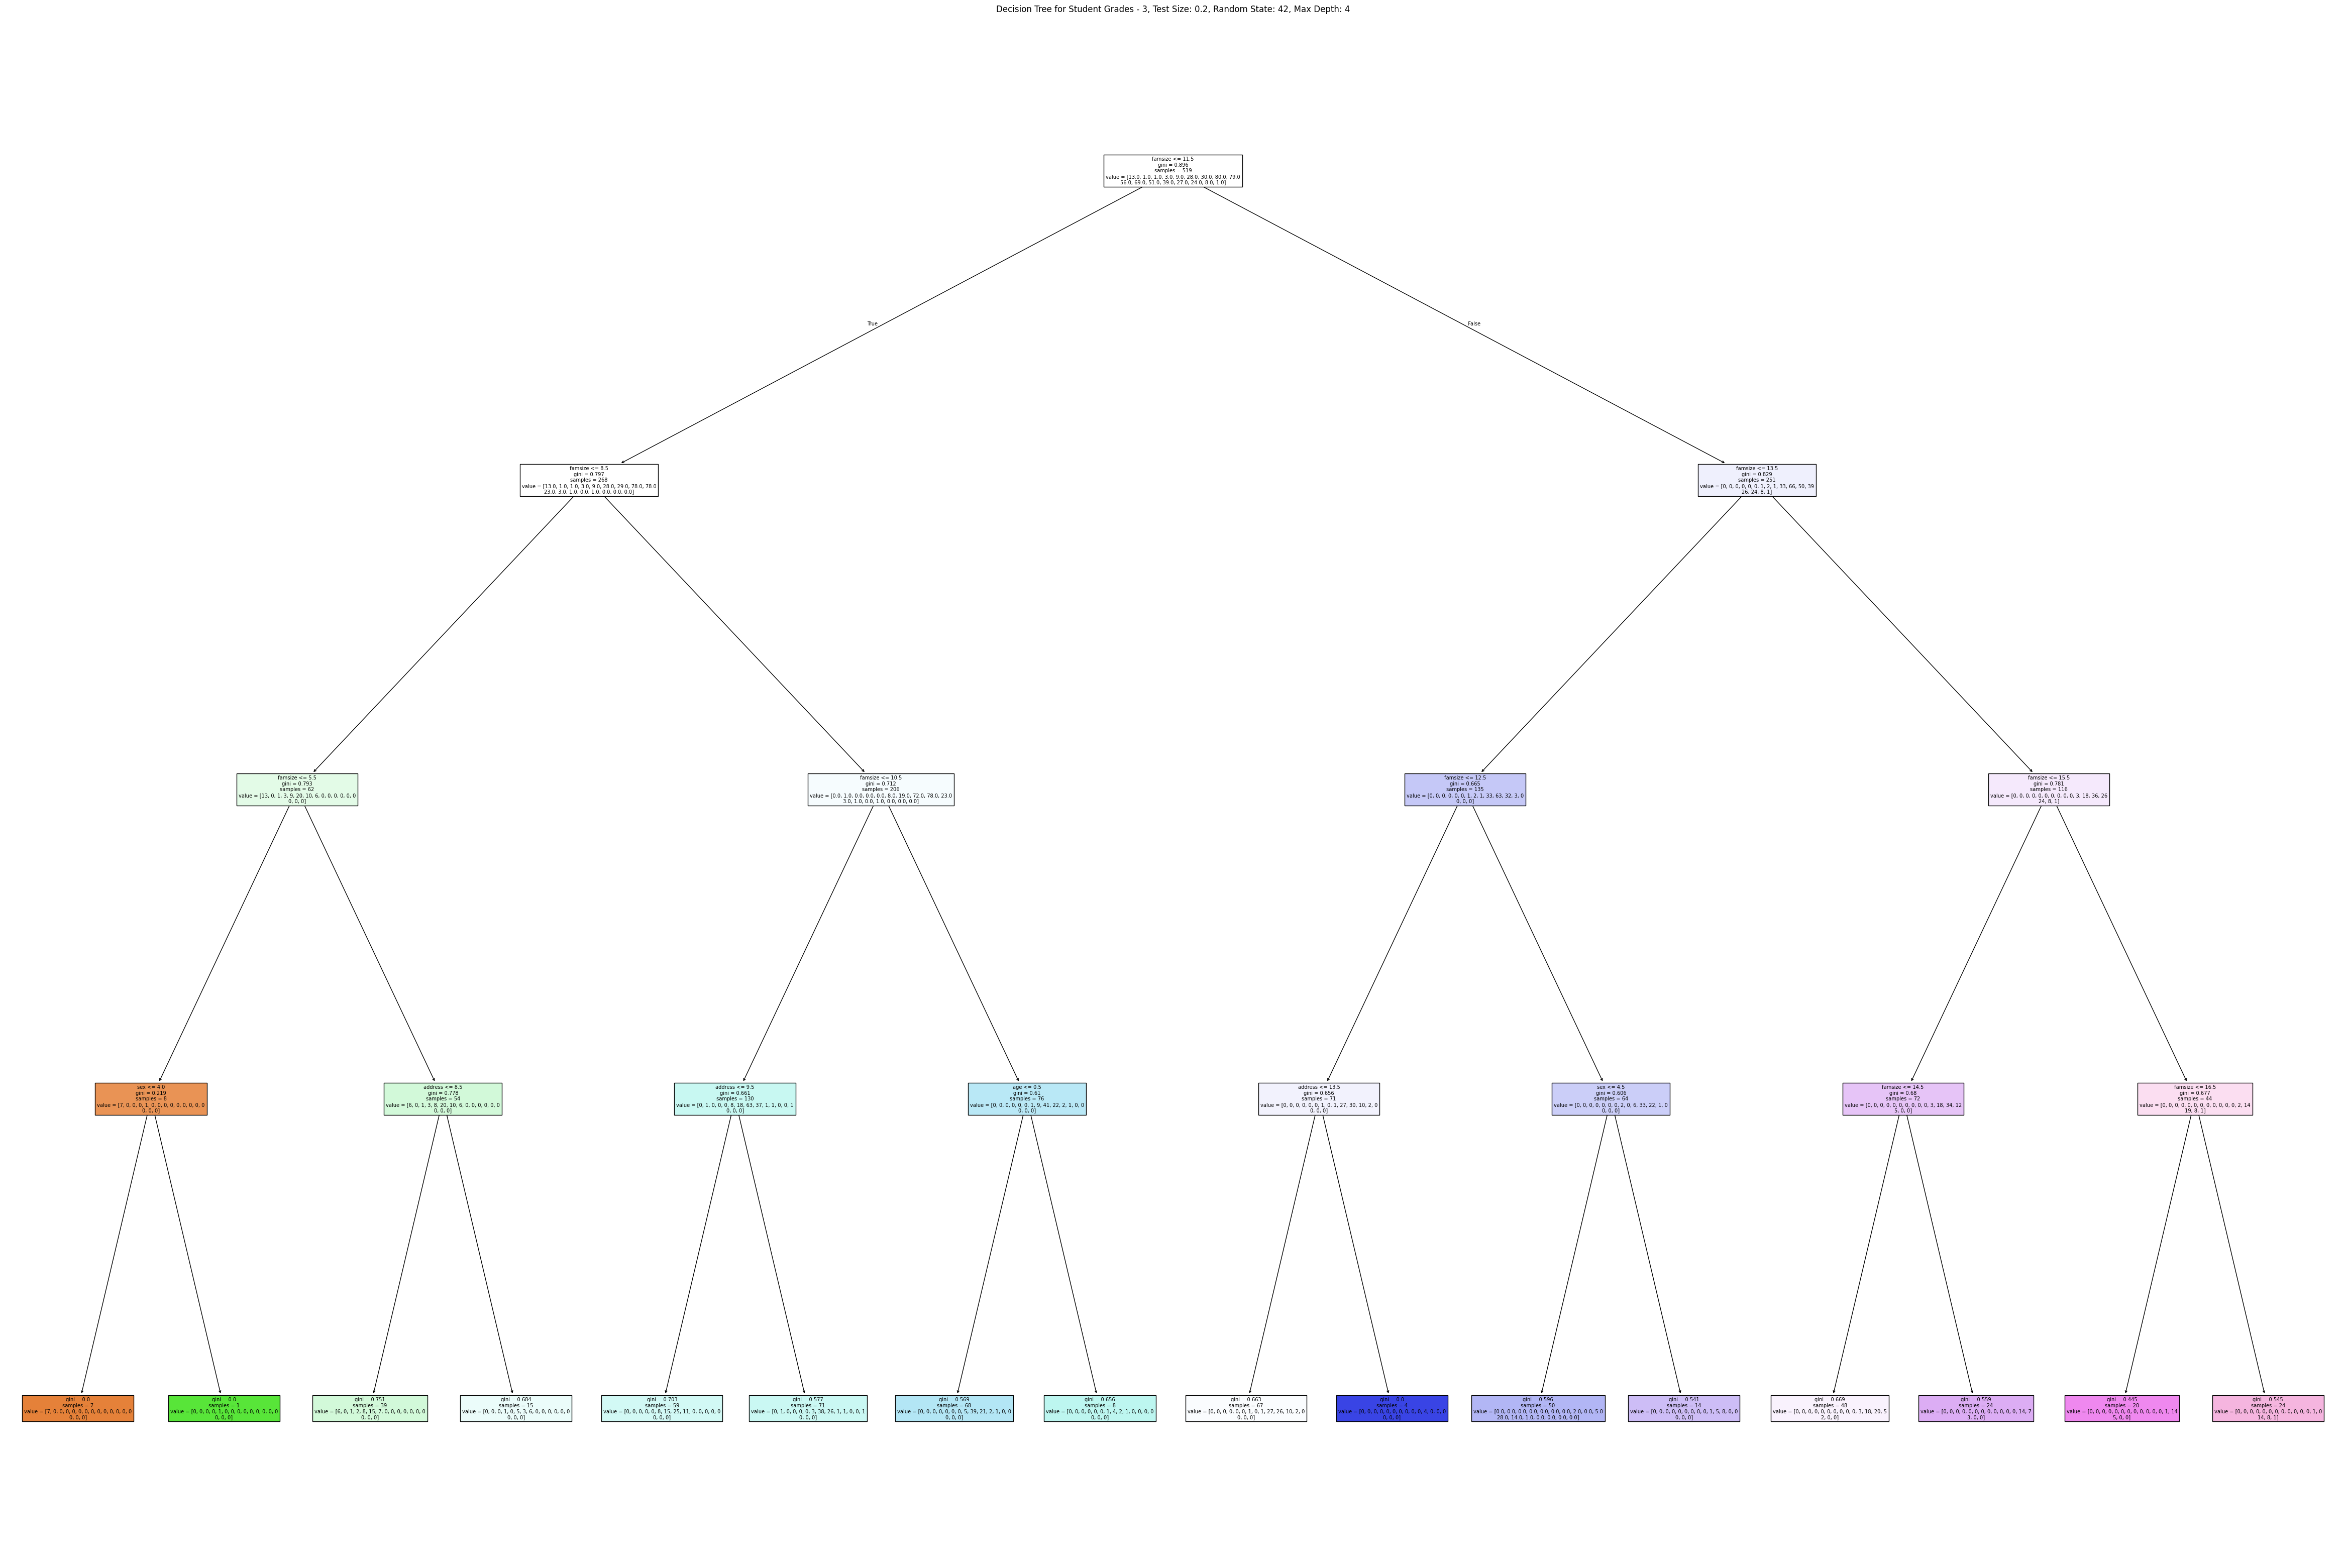

In [9]:
import json
import matplotlib.pyplot as plt 
import pandas as pd
import os
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

QUES = 3

df = pd.read_csv("student-por.csv")
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

features = ['studytime', 'absences', 'failures', 'G1', 'G2']
target = 'G3'

X = df[features]
y = df[target]

os.makedirs(f"outputs_{QUES}", exist_ok=True)

config_file = "config.json"


with open(config_file, 'r') as f:
    config = json.load(f)


TEST_SIZE = config.get("test_size", 0.2)
TYPE = config.get("type", 1)
RANDOM_STATE = config.get("random_state", 42)
MAX_DEPTH = config.get("max_depth", 4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y if TYPE == 1 and len(set(y)) > 1 else None)
clf = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=MAX_DEPTH)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

df['pass_fail'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print("rows: actual, columns: predicted")
print("                          Fail  Pass")
for i, species in enumerate(["Fail", "Pass"]):
    print(f"{species:12} {cm[i][0]:7} {cm[i][1]:11}")

print("Manual precision, recall, F1-score calculation:")
for i, species in enumerate(["Fail", "Pass"]):
    TP = cm[i][i]
    FP = sum(cm[:, i]) - TP
    FN = sum(cm[i, :]) - TP
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    print(f"{species}: Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

with open(os.path.join(f"outputs_{QUES}", f"confusion_matrix_type_{TYPE}_TS_{TEST_SIZE}_RS_{RANDOM_STATE}_MD_{MAX_DEPTH}.txt"), 'w') as f:
    f.write("Confusion Matrix:\n")
    f.write("rows: actual, columns: predicted\n")
    f.write("                          Fail  Pass\n")
    for i, species in enumerate(["Fail", "Pass"]):
        f.write(f"{species:12} {cm[i][0]:7} {cm[i][1]:11}\n")
    f.write("\nManual precision, recall, F1-score calculation:\n")
    for i, species in enumerate(["Fail", "Pass"]):
        TP = cm[i][i]
        FP = sum(cm[:, i]) - TP
        FN = sum(cm[i, :]) - TP
        precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        recall = TP / (TP + FN) if (TP + FN) != 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
        f.write(f"{species}: Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

plt.figure(figsize=(60, 40))
plot_tree(clf, filled=True, feature_names=df.columns[:-1])
plt.title(f"Decision Tree for Student Grades - {TYPE}, Test Size: {TEST_SIZE}, Random State: {RANDOM_STATE}, Max Depth: {MAX_DEPTH}")

plt.savefig(os.path.join(f"outputs_{QUES}", f"decision_tree_type_{TYPE}_TS_{TEST_SIZE}_RS_{RANDOM_STATE}_MD_{MAX_DEPTH}.png"))
plt.show()
